In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os.path as op
import numpy as np
import pandas as pd
from mriqc.viz.misc import (
    raters_variability_plot, plot_abide_stripplots, plot_corrmat, plot_histograms, figure1
)
from pkg_resources import resource_filename as pkgrf
from mriqc.classifier.data import read_dataset, zscore_dataset
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sn
sn.set(style="whitegrid")

data_path = '/home/oesteban/Google Drive/mriqc'

/home/oesteban/miniconda2/envs/nipypedev-3.5/lib/python3.5/site-packages/matplotlib-1.5.1-py3.5-linux-x86_64.egg/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
mit_csv = '/home/oesteban/mriqc/mit-satra/T1-mit.csv'
abide_csv = op.join(data_path, 'runs/20170505_0.9.3-2017-04-23-2ba2c2e40c39/T1w.csv')


In [3]:
mit_df = pd.read_csv(mit_csv, index_col=False, dtype={'subject_id': object})
abide_df, pp_cols = read_dataset(abide_csv, op.join(data_path, 'ABIDE_QC_all.csv'), rate_label='rater_1')

2017-05-09 12:41:13,188 mriqc.classifier:INFO Created dataset X="/home/oesteban/Google Drive/mriqc/runs/20170505_0.9.3-2017-04-23-2ba2c2e40c39/T1w.csv", Y="/home/oesteban/Google Drive/mriqc/ABIDE_QC_all.csv" (N=1102 valid samples)
2017-05-09 12:41:13,189 mriqc.classifier:INFO Ratings distribution: "fail"=157 / "ok"=945 (14.246824% failed)


In [4]:
mit_df['rater'] = [1] * len(mit_df)
mit_df['site'] = ['MIT'] * len(mit_df)
abide_df['rater'] = [0] * len(abide_df)

del abide_df['rater_1']
mdata = pd.concat([abide_df, mit_df], axis=0)


2017-05-09 12:48:52,613 mriqc.classifier:INFO z-scoring dataset ...
/home/oesteban/miniconda2/envs/nipypedev-3.5/lib/python3.5/site-packages/scipy/stats/stats.py:2240: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/home/oesteban/miniconda2/envs/nipypedev-3.5/lib/python3.5/site-packages/scipy/stats/stats.py:2240: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/home/oesteban/miniconda2/envs/nipypedev-3.5/lib/python3.5/site-packages/scipy/stats/stats.py:2240: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/home/oesteban/miniconda2/envs/nipypedev-3.5/lib/python3.5/site-packages/scipy/stats/stats.py:2240: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/home/oesteban/miniconda2/envs/nipypedev-3.5/lib/python3.5/site-packages/scipy/stats/stats.py:2240: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/home/oesteban/mi

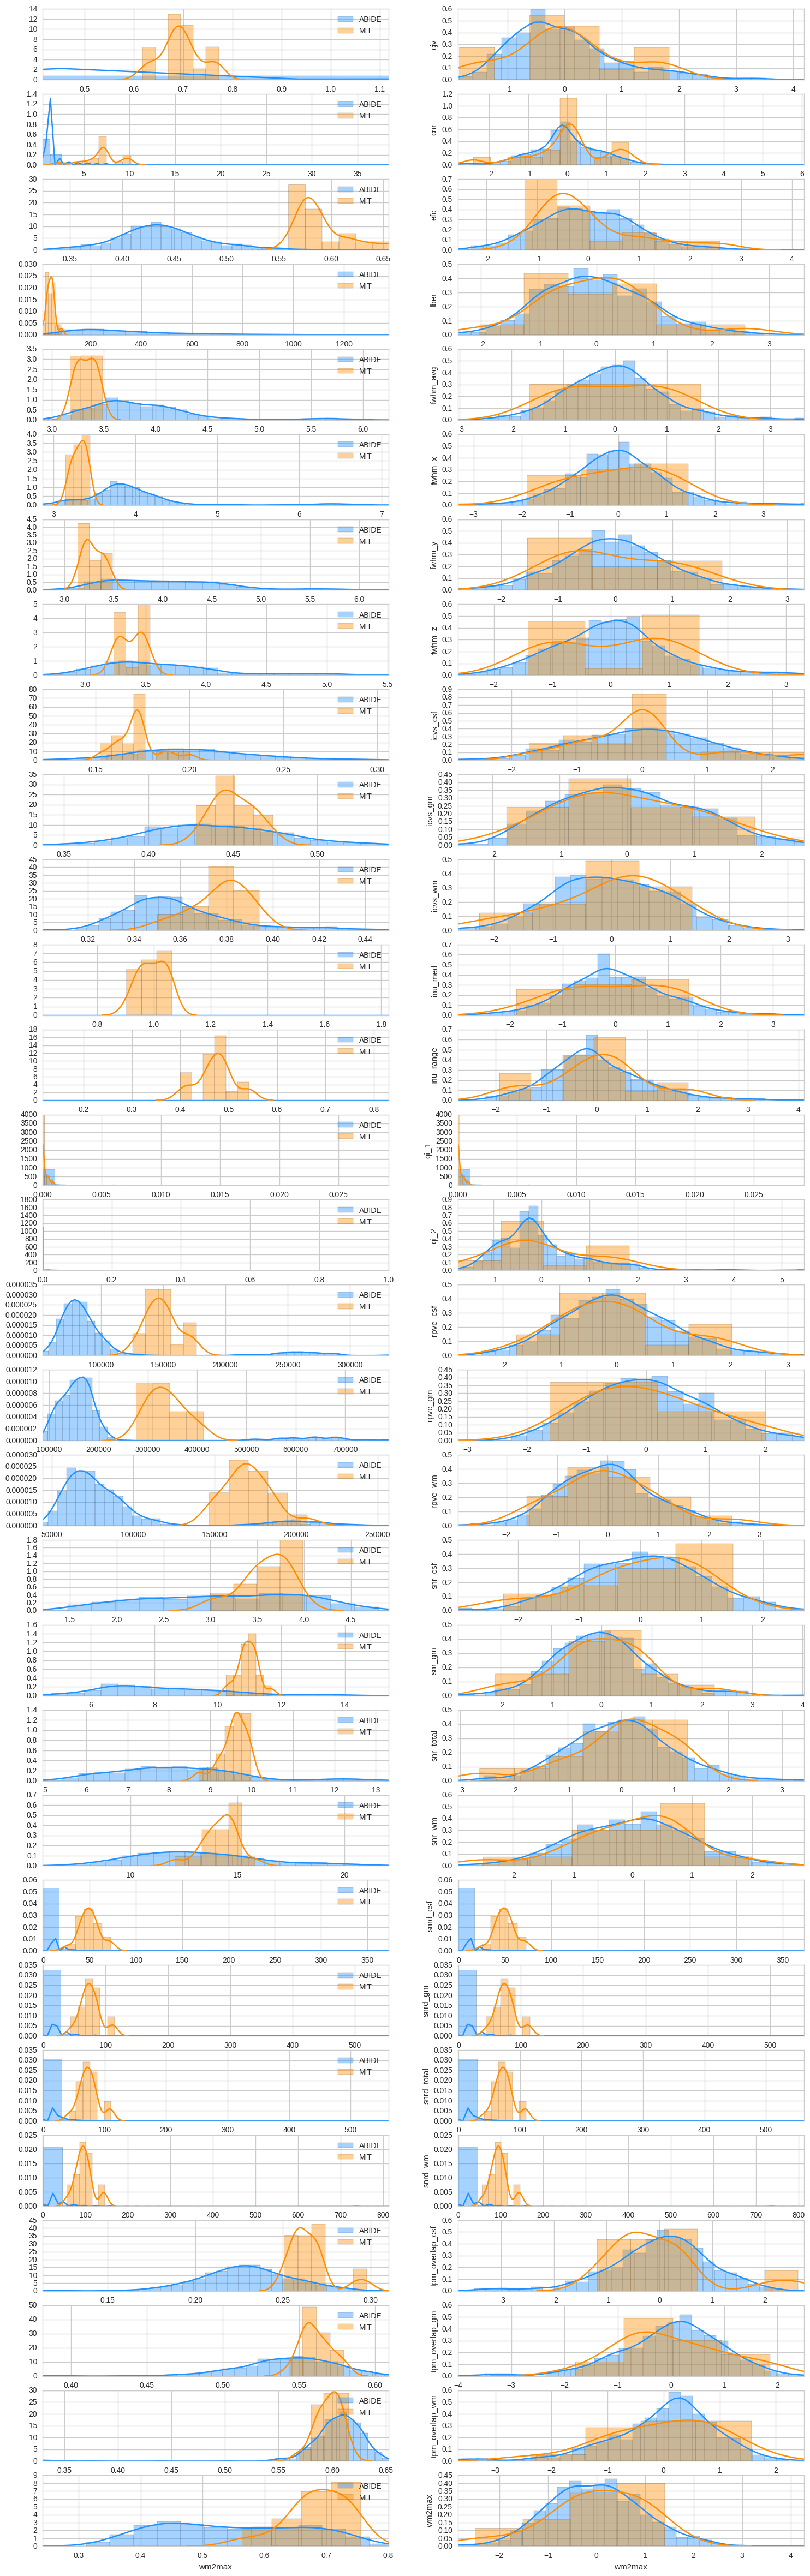

In [11]:

zscored = zscore_dataset(
        mdata, excl_columns=['rater', 'size_x', 'size_y', 'size_z',
                             'spacing_x', 'spacing_y', 'spacing_z'])

colnames = [col for col in sorted(pp_cols)
            if not (col.startswith('spacing') or col.startswith('summary') or col.startswith('size'))]

nrows = len(colnames)
# palette = ['dodgerblue', 'darkorange']

fig = plt.figure(figsize=(18, 2 * nrows))
gs = GridSpec(nrows, 2, hspace=0.2)

for i, col in enumerate(sorted(colnames)):
    ax_nzs = plt.subplot(gs[i, 0])
    ax_zsd = plt.subplot(gs[i, 1])

    sn.distplot(mdata.loc[(mdata.rater == 0), col], norm_hist=False,
                label='ABIDE', ax=ax_nzs, color='dodgerblue')
    sn.distplot(mdata.loc[(mdata.rater == 1), col], norm_hist=False,
                label='MIT', ax=ax_nzs, color='darkorange')
    ax_nzs.legend()

    sn.distplot(zscored.loc[(zscored.rater == 0), col], norm_hist=False,
                label='ABIDE', ax=ax_zsd, color='dodgerblue')
    sn.distplot(zscored.loc[(zscored.rater == 1), col], norm_hist=False,
                label='MIT', ax=ax_zsd, color='darkorange')

    alldata = mdata[[col]].values.ravel().tolist()
    minv = np.percentile(alldata, 0.2)
    maxv = np.percentile(alldata, 99.8)
    ax_nzs.set_xlim([minv, maxv])

    alldata = zscored[[col]].values.ravel().tolist()
    minv = np.percentile(alldata, 0.2)
    maxv = np.percentile(alldata, 99.8)
    ax_zsd.set_xlim([minv, maxv])
    
    ax_zsd.set_ylabel(col)
fig.savefig('/home/oesteban/tmp/mriqc-ml-tests-2/histograms-mit.svg', format='svg', pad_inches=0, dpi=100)


In [18]:
abide_df, pp_cols = read_dataset(abide_csv, op.join(data_path, 'ABIDE_QC_all.csv'), rate_label='rater_1')

2017-05-09 13:22:32,934 mriqc.classifier:INFO Created dataset X="/home/oesteban/Google Drive/mriqc/runs/20170505_0.9.3-2017-04-23-2ba2c2e40c39/T1w.csv", Y="/home/oesteban/Google Drive/mriqc/ABIDE_QC_all.csv" (N=1102 valid samples)
2017-05-09 13:22:32,935 mriqc.classifier:INFO Ratings distribution: "fail"=157 / "ok"=945 (14.246824% failed)


In [30]:
accept = abide_df[abide_df.rater_1 == 0]
exclude = abide_df[abide_df.rater_1 == 1]

In [42]:
mit_df = pd.read_csv(mit_csv, index_col=False, dtype={'subject_id': object})

means = {}
for i, col in enumerate(sorted(colnames)):
    means[col] = np.median(accept[[col]].values)
    mit_copy = mit_df.copy()
    mit_copy[[col]] = [means[col]] * len(mit_copy)
    
    mit_copy.to_csv('/home/oesteban/tmp/mriqc-ml-tests-2/mit_t1_%s.csv' % col, index=False)
    
    bad_m = np.median(exclude[[col]].values)
    print('%s: %f +- %f :: %f +- %f' % (col, means[col], accept[[col]].std(), bad_m, exclude[[col]].std()))

cjv: 0.534152 +- 1.969061 :: 0.684241 +- 0.086561
cnr: 1.234355 +- 3.213620 :: 0.982113 +- 3.818844
efc: 0.435697 +- 0.045752 :: 0.432633 +- 0.046946
fber: 282.273407 +- 255.417145 :: 282.809296 +- 394.996864
fwhm_avg: 3.759040 +- 0.567771 :: 3.748260 +- 0.488057
fwhm_x: 3.861890 +- 0.682650 :: 3.774910 +- 0.492809
fwhm_y: 3.971260 +- 0.612166 :: 3.983520 +- 0.725219
fwhm_z: 3.500130 +- 0.526772 :: 3.626810 +- 0.445577
icvs_csf: 0.200145 +- 0.034717 :: 0.195731 +- 0.027716
icvs_gm: 0.433532 +- 0.039529 :: 0.446504 +- 0.025750
icvs_wm: 0.355216 +- 0.024885 :: 0.351281 +- 0.020273
inu_med: 1.046134 +- 108.647746 :: 1.172418 +- 0.215986
inu_range: 0.370826 +- 326.773036 :: 0.431262 +- 0.153668
qi_1: 0.000000 +- 0.002333 :: 0.000000 +- 0.000318
qi_2: 0.004703 +- 0.080995 :: 0.000852 +- 0.008407
rpve_csf: 82966.210938 +- 55864.690766 :: 85141.671875 +- 31555.103391
rpve_gm: 162144.156250 +- 150281.174731 :: 149847.656250 +- 70142.405120
rpve_wm: 73056.195312 +- 42219.593495 :: 81386.890625 

In [35]:
pred = pd.read_csv('/home/oesteban/tmp/mriqc-ml-tests-2/predicted_orig.csv', index_col=False)

In [37]:
for i, col in enumerate(sorted(colnames)):
    pred[col] = pd.read_csv('/home/oesteban/tmp/mriqc-ml-tests-2/predicted_mit_t1_%s.csv' % col).prediction.values

In [44]:
pred.to_csv('/home/oesteban/tmp/mriqc-ml-tests-2/predictions_wrt_iqms.csv', index=False)

In [43]:
pred.describe()

,prediction,cjv,cnr,efc,fber,fwhm_avg,fwhm_x,fwhm_y,fwhm_z,icvs_csf,...,snr_total,snr_wm,snrd_csf,snrd_gm,snrd_total,snrd_wm,tpm_overlap_csf,tpm_overlap_gm,tpm_overlap_wm,wm2max
count,18.000000,18.0,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,...,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,0.666667,0.0,0.611111,0.611111,0.500000,0.666667,0.666667,0.555556,0.666667,0.555556,...,0.777778,0.722222,0.277778,0.555556,0.611111,0.555556,0.666667,0.666667,0.500000,0.611111
std,0.485071,0.0,0.501631,0.501631,0.514496,0.485071,0.485071,0.511310,0.485071,0.511310,...,0.427793,0.460889,0.460889,0.511310,0.501631,0.511310,0.485071,0.485071,0.514496,0.501631
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.0,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000
75%,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
